<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [68]:
##### Your Code Here #####

import pandas as pd

df = pd.read_csv('./amesHousePrice.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [72]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [73]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [74]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [75]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [76]:
df['FireplaceQu'].dtype

dtype('O')

In [179]:
df2 = df.copy()

for column in df2.columns:
    if df2[column].dtype == 'O':
        df2[column] = df2[column].fillna(value='Missing')
    else:
        df2[column] = df2[column].fillna(value=0)
        
df2.isnull().sum().sort_values(ascending=False)

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
                ..
PoolArea         0
GarageCars       0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageArea       0
GarageFinish     0
Electrical       0
HalfBath         0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
BedroomAbvGr     0
GarageYrBlt 

In [180]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2)

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
582,90,RL,81.0,11841,Grvl,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,118500
423,60,RL,80.0,9200,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,6,2008,WD,Normal,315000
1387,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Missing,GdWo,Missing,0,8,2007,CWD,Family,136000
437,45,RM,50.0,6000,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,1,2009,WD,Normal,119000
704,20,RL,70.0,8400,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,5,2010,WD,Normal,213000


In [181]:
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis=1)
y_test = test['SalePrice']
X_test = test.drop('SalePrice', axis=1)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1437,20,RL,96.0,12444,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,0,Missing,Missing,Missing,0,11,2008,New,Partial
584,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,...,120,0,Missing,Missing,Missing,0,7,2009,WD,Normal
1261,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal
602,60,RL,80.0,10041,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml
1063,30,RM,50.0,6000,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,Missing,MnPrv,Missing,0,7,2006,WD,Normal


In [81]:
!pip install category_encoders

    100% |████████████████████████████████| 102kB 20.9MB/s a 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [82]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_train_encoded[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
294,20,1,80.0,9600,1,1,1,1,1,1,...,0,0,1,1,1,0,10,2009,1,1
1145,50,2,52.0,6240,1,1,1,1,1,1,...,0,0,1,1,1,0,8,2006,1,2
335,190,1,0.0,164660,2,1,2,2,1,2,...,0,0,1,1,2,700,8,2008,1,1
297,60,3,66.0,7399,1,2,2,1,1,1,...,198,0,1,1,1,0,6,2007,1,1
1457,70,1,66.0,9042,1,1,1,1,1,1,...,0,0,1,2,2,2500,5,2010,1,1


In [83]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_train_normalized = norm.fit_transform(X_train_encoded)
X_test_normalized = norm.transform(X_test_encoded)

X_train_normalized[:5]

array([[1.84925227e-03, 9.24626136e-05, 7.39700909e-03, 8.87641091e-01,
        9.24626136e-05, 9.24626136e-05, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 9.24626136e-05, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 9.24626136e-05, 9.24626136e-05, 9.24626136e-05,
        5.54775682e-04, 4.62313068e-04, 1.80579484e-01, 1.80579484e-01,
        9.24626136e-05, 9.24626136e-05, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 2.20061020e-02, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 9.24626136e-05, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 1.18814458e-01, 9.24626136e-05, 0.00000000e+00,
        1.21126024e-02, 1.30927061e-01, 9.24626136e-05, 9.24626136e-05,
        9.24626136e-05, 9.24626136e-05, 1.52008537e-01, 0.00000000e+00,
        0.00000000e+00, 1.52008537e-01, 9.24626136e-05, 0.00000000e+00,
        9.24626136e-05, 0.00000000e+00, 2.77387841e-04, 9.24626136e-05,
        9.24626136e-05, 6.47238295e-04, 9.24626136e-05, 1.849252

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name="nn1")
model.add(Dense(40, input_dim=79, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 40)                3200      
_________________________________________________________________
dense_41 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 4,241
Trainable params: 4,241
Non-trainable params: 0
_________________________________________________________________


In [164]:
history = model.fit(X_train_normalized, y_train, epochs=250, validation_split=.10)

Train on 985 samples, validate on 110 samples
Epoch 1/250
985/985 [==============================] - 0s 472us/sample - loss: 39057246754.8264 - mean_squared_error: 39057248256.0000 - val_loss: 36152318585.0182 - val_mean_squared_error: 36152315904.0000
Epoch 2/250
985/985 [==============================] - 0s 52us/sample - loss: 39056471440.2437 - mean_squared_error: 39056470016.0000 - val_loss: 36150999747.4909 - val_mean_squared_error: 36150996992.0000
Epoch 3/250
985/985 [==============================] - 0s 54us/sample - loss: 39053988072.8690 - mean_squared_error: 39053983744.0000 - val_loss: 36146962729.8909 - val_mean_squared_error: 36146966528.0000
Epoch 4/250
985/985 [==============================] - 0s 51us/sample - loss: 39047273913.8274 - mean_squared_error: 39047270400.0000 - val_loss: 36137057335.8545 - val_mean_squared_error: 36137054208.0000
Epoch 5/250
985/985 [==============================] - 0s 51us/sample - loss: 39032133072.6985 - mean_squared_error: 39032131584.

In [158]:
scores = model.evaluate(X_test_normalized, y_test)

365/365 [==============================] - 0s 25us/sample - loss: 4242867097.6000 - mean_squared_error: 4242867200.0000


In [159]:
print(f'{model.metrics_names[1]}: {scores[1]}')

mean_squared_error: 4242867200.0


In [124]:
history

In [128]:
print('\nhistory dict:', history.history)


history dict: {'loss': [4560759408.276142, 4540851892.369543, 4529272637.3360405, 4513658013.498477, 4500250274.696446, 4486020668.556345, 4473076856.073096, 4458707273.551269, 4443677051.4517765, 4428913408.259898, 4415976157.9532995, 4401264911.33401, 4388170873.372589, 4372585793.494416, 4360320322.014214, 4345352176.925888, 4330433189.035533, 4318301761.494416, 4302362395.029442, 4288045200.2436547, 4274532154.737056, 4261010745.4375634, 4246572693.181726, 4234059698.290355, 4217359680.5847716, 4206845762.2741117, 4193093195.630457, 4175729569.6568527, 4161689471.870051, 4146699443.849746, 4133225866.26599, 4118670358.871066, 4104297097.746193, 4091405434.152284, 4077132827.9390864, 4062746316.8, 4050568597.181726, 4033786075.8741117, 4021295889.932995, 4008557967.204061, 3992977925.457868, 3979828203.9878173, 3965257973.8639593, 3953145980.4913707, 3940636222.3756347, 3924746054.9522843, 3912986511.723858, 3896661251.1187816, 3883617418.7857866, 3872367490.8588834, 3856827592.641

In [130]:
history.history['loss']

[4560759408.276142,
 4540851892.369543,
 4529272637.3360405,
 4513658013.498477,
 4500250274.696446,
 4486020668.556345,
 4473076856.073096,
 4458707273.551269,
 4443677051.4517765,
 4428913408.259898,
 4415976157.9532995,
 4401264911.33401,
 4388170873.372589,
 4372585793.494416,
 4360320322.014214,
 4345352176.925888,
 4330433189.035533,
 4318301761.494416,
 4302362395.029442,
 4288045200.2436547,
 4274532154.737056,
 4261010745.4375634,
 4246572693.181726,
 4234059698.290355,
 4217359680.5847716,
 4206845762.2741117,
 4193093195.630457,
 4175729569.6568527,
 4161689471.870051,
 4146699443.849746,
 4133225866.26599,
 4118670358.871066,
 4104297097.746193,
 4091405434.152284,
 4077132827.9390864,
 4062746316.8,
 4050568597.181726,
 4033786075.8741117,
 4021295889.932995,
 4008557967.204061,
 3992977925.457868,
 3979828203.9878173,
 3965257973.8639593,
 3953145980.4913707,
 3940636222.3756347,
 3924746054.9522843,
 3912986511.723858,
 3896661251.1187816,
 3883617418.7857866,
 387236749

In [132]:
type(history.history['loss'])

list

In [133]:
len(history.history['loss'])

250

In [135]:
min(history.history['loss'])

2381891791.0416245

In [139]:
yaxis = [num / 1000000000 for num in history.history['loss']]

In [142]:
yaxis

[4.560759408276142,
 4.540851892369543,
 4.529272637336041,
 4.513658013498477,
 4.500250274696446,
 4.486020668556345,
 4.473076856073097,
 4.458707273551268,
 4.443677051451776,
 4.428913408259898,
 4.4159761579533,
 4.40126491133401,
 4.388170873372589,
 4.372585793494416,
 4.360320322014213,
 4.345352176925888,
 4.330433189035533,
 4.318301761494416,
 4.302362395029442,
 4.288045200243655,
 4.274532154737056,
 4.261010745437564,
 4.246572693181726,
 4.2340596982903556,
 4.217359680584772,
 4.206845762274112,
 4.193093195630457,
 4.175729569656853,
 4.161689471870051,
 4.146699443849746,
 4.13322586626599,
 4.118670358871066,
 4.104297097746193,
 4.091405434152284,
 4.077132827939087,
 4.0627463168,
 4.050568597181726,
 4.0337860758741115,
 4.021295889932995,
 4.008557967204061,
 3.992977925457868,
 3.9798282039878172,
 3.9652579738639595,
 3.953145980491371,
 3.940636222375635,
 3.9247460549522843,
 3.912986511723858,
 3.8966612511187817,
 3.8836174187857866,
 3.8723674908588834,
 

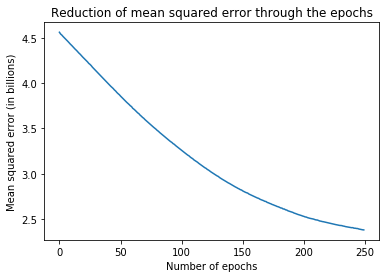

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(yaxis)
plt.xlabel('Number of epochs')
plt.ylabel('Mean squared error (in billions)')
plt.title('Reduction of mean squared error through the epochs')
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

reg.fit(X_train_normalized, y_train)
y_pred = reg.predict(X_test_normalized)

lin_mse = mean_squared_error(y_test, y_pred)

In [160]:
if lin_mse > scores[1]:
    print("The neural network's MSE is ${:,.2f} lower than the regression's MSE.".format(lin_mse - scores[1]))
else:
    print("The regression's MSE is ${:,.2f} lower than the neural network's MSE.".format(scores[1] - lin_mse))

The regression's MSE is $2,758,222,467.30 lower than the neural network's MSE.


In [165]:
model2 = Sequential(name="nn2")
model2.add(Dense(20, input_dim=79, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(1, activation='relu'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 20)                1600      
_________________________________________________________________
dense_45 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_46 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 21        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________


In [166]:
history2 = model2.fit(X_train_normalized, y_train, epochs=250, validation_split=.10)

Train on 985 samples, validate on 110 samples
Epoch 1/250
985/985 [==============================] - 1s 566us/sample - loss: 39057434143.7076 - mean_squared_error: 39057436672.0000 - val_loss: 36152687783.5636 - val_mean_squared_error: 36152684544.0000
Epoch 2/250
985/985 [==============================] - 0s 52us/sample - loss: 39057210327.4558 - mean_squared_error: 39057211392.0000 - val_loss: 36152217078.6909 - val_mean_squared_error: 36152217600.0000
Epoch 3/250
985/985 [==============================] - 0s 52us/sample - loss: 39055954955.4355 - mean_squared_error: 39055953920.0000 - val_loss: 36149595601.4545 - val_mean_squared_error: 36149596160.0000
Epoch 4/250
985/985 [==============================] - 0s 52us/sample - loss: 39049389200.5035 - mean_squared_error: 39049388032.0000 - val_loss: 36136450904.4364 - val_mean_squared_error: 36136452096.0000
Epoch 5/250
985/985 [==============================] - 0s 50us/sample - loss: 39019732334.9766 - mean_squared_error: 39019737088.

In [169]:
scores2 = model2.evaluate(X_test_normalized, y_test)

365/365 [==============================] - 0s 29us/sample - loss: 2062225476.0329 - mean_squared_error: 2062225664.0000


In [170]:
if lin_mse > scores2[1]:
    print("The neural network's MSE is ${:,.2f} lower than the regression's MSE.".format(lin_mse - scores2[1]))
else:
    print("The regression's MSE is ${:,.2f} lower than the neural network's MSE.".format(scores2[1] - lin_mse))

The regression's MSE is $577,580,931.30 lower than the neural network's MSE.


In [171]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [182]:
def feature_engineering(X):
    Y = X.copy()
    Y['TotalBath'] = Y['FullBath'] + Y['HalfBath']
    Y['YearsBeforeSell'] = Y['YrSold'] - Y['YearBuilt']
    
    return Y
    
X_train2 = feature_engineering(X_train)
X_test2 = feature_engineering(X_test)
print(X_train2.shape)
X_train2.head()

(1095, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,YearsBeforeSell
1437,20,RL,96.0,12444,Pave,Missing,Reg,Lvl,AllPub,FR2,...,Missing,Missing,Missing,0,11,2008,New,Partial,2,0
584,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,...,Missing,Missing,Missing,0,7,2009,WD,Normal,1,74
1261,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,Inside,...,Missing,Missing,Missing,0,6,2009,WD,Normal,1,53
602,60,RL,80.0,10041,Pave,Missing,IR1,Lvl,AllPub,Inside,...,Missing,Missing,Missing,0,2,2006,WD,Abnorml,3,14
1063,30,RM,50.0,6000,Pave,Missing,Reg,Lvl,AllPub,Inside,...,Missing,MnPrv,Missing,0,7,2006,WD,Normal,1,81


In [183]:
X_train2.isnull().sum().sort_values(ascending=False)

YearsBeforeSell    0
HeatingQC          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
Utilities          0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
                  ..
PoolArea           0
PoolQC             0
Fence              0
MiscFeature        0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
GarageArea         0
GarageCars         0
GarageFinish       0
HalfBath           0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea    

In [184]:
X_train_encoded2 = encoder.fit_transform(X_train2)
X_test_encoded2 = encoder.transform(X_test2)

X_train_normalized2 = norm.fit_transform(X_train_encoded2)
X_test_normalized2 = norm.transform(X_test_encoded2)

reg2 = LinearRegression()

reg2.fit(X_train_normalized2, y_train)
y_pred2 = reg2.predict(X_test_normalized2)

lin_mse2 = mean_squared_error(y_test, y_pred2)

In [185]:
model3 = Sequential(name="nn3")
model3.add(Dense(20, input_dim=81, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(1, activation='relu'))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 20)                1640      
_________________________________________________________________
dense_51 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_52 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_53 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_54 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 21        
Total params: 3,341
Trainable params: 3,341
Non-trainable params: 0
_________________________________________________________________


In [186]:
history3 = model3.fit(X_train_normalized2, y_train, epochs=250, validation_split=.10)

Train on 985 samples, validate on 110 samples
Epoch 1/250
985/985 [==============================] - 1s 578us/sample - loss: 39114978226.0305 - mean_squared_error: 39114981376.0000 - val_loss: 39183804006.4000 - val_mean_squared_error: 39183802368.0000
Epoch 2/250
985/985 [==============================] - 0s 51us/sample - loss: 39114700968.4142 - mean_squared_error: 39114698752.0000 - val_loss: 39183129618.6182 - val_mean_squared_error: 39183130624.0000
Epoch 3/250
985/985 [==============================] - 0s 52us/sample - loss: 39112651571.2000 - mean_squared_error: 39112646656.0000 - val_loss: 39178541093.2364 - val_mean_squared_error: 39178539008.0000
Epoch 4/250
985/985 [==============================] - 0s 53us/sample - loss: 39100531814.9198 - mean_squared_error: 39100526592.0000 - val_loss: 39153808216.4364 - val_mean_squared_error: 39153807360.0000
Epoch 5/250
985/985 [==============================] - 0s 52us/sample - loss: 39045554255.0091 - mean_squared_error: 39045554176.

In [187]:
scores3 = model3.evaluate(X_test_normalized2, y_test)

365/365 [==============================] - 0s 30us/sample - loss: 1522597145.9507 - mean_squared_error: 1522597120.0000


In [188]:
print("After feature engineering, the regression's MSE improved by ${:,.2f}"
      .format(lin_mse - lin_mse2))

print("After feature engineering, the neural network's MSE improved by ${:,.2f}"
      .format(scores2[1] - scores3[1]))

After feature engineering, the regression's MSE improved by $-631,583,988.09
After feature engineering, the neural network's MSE improved by $539,628,544.00


### Analysis:

Interesting; the new features significantly hurt the regression but significantly helped the network.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [221]:
##### Your Code Here #####

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [222]:
batch_size = 64
num_classes = 10
epochs = 250

In [223]:
X_train[0].shape

(28, 28)

In [224]:
X_train.shape

(60000, 28, 28)

In [225]:
X_test.shape

(10000, 28, 28)

In [226]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train.shape

(60000, 784)

In [227]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
type(X_train)

numpy.ndarray

In [228]:
type(X_train[0][0])

numpy.float32

In [229]:
from tensorflow.keras.utils import to_categorical

y_train2 = to_categorical(y_train, num_classes)
y_test2 = to_categorical(y_test, num_classes)

In [230]:
y_train2[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [211]:
mnist_model = Sequential(name='mnist_model')

mnist_model.add(Dense(30, input_dim=784, activation='relu'))
mnist_model.add(Dense(30, activation='relu'))
mnist_model.add(Dense(30, activation='relu'))
mnist_model.add(Dense(30, activation='relu'))
mnist_model.add(Dense(30, activation='relu'))
mnist_model.add(Dense(10, activation='sigmoid'))

mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_63 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_64 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_65 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_66 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_67 (Dense)             (None, 10)                310       
Total params: 27,580
Trainable params: 27,580
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = mnist_model.fit(X_train, y_train2, batch_size=batch_size, epochs=epochs, verbose=False)
scores = mnist_model.evaluate(X_test, y_test2)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 49us/sample - loss: nan - acc: 0.1000
acc: 10.000000149011612


In [214]:
mnist_model2 = Sequential(name='mnist_model2')

mnist_model2.add(Dense(20, input_dim=784, activation='relu'))
mnist_model2.add(Dense(20, activation='relu'))
mnist_model2.add(Dense(20, activation='relu'))
mnist_model2.add(Dense(10, activation='sigmoid'))

mnist_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mnist_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_69 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_70 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________


In [215]:
history2 = mnist_model2.fit(X_train, y_train2, batch_size=batch_size, epochs=epochs, verbose=False)
scores2 = mnist_model2.evaluate(X_test, y_test2)
print(f'{mnist_model2.metrics_names[1]}: {scores2[1]*100}%')

10000/10000 [==============================] - 1s 51us/sample - loss: nan - acc: 0.1000
acc: 10.000000149011612%


In [232]:
batch_size = 64
num_classes = 20
epochs = 250

y_train3 = to_categorical(y_train, num_classes)
y_test3 = to_categorical(y_test, num_classes)

mnist_model3 = Sequential(name='mnist_model2')
mnist_model3.add(Dense(30, input_dim=784, activation='relu'))
mnist_model3.add(Dense(30, activation='relu'))
mnist_model3.add(Dense(30, activation='relu'))
mnist_model3.add(Dense(20, activation='sigmoid'))
mnist_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = mnist_model3.fit(X_train, y_train3, batch_size=batch_size, epochs=epochs, verbose=False)
scores3 = mnist_model3.evaluate(X_test, y_test3)
print(f'{mnist_model3.metrics_names[1]}: {scores3[1]*100}%')

10000/10000 [==============================] - 1s 53us/sample - loss: 8.5885 - acc: 0.1995
acc: 19.949999451637268%


In [233]:
mnist_model4 = Sequential(name='mnist_model4')
mnist_model4.add(Dense(30, input_dim=784, activation='relu'))
mnist_model4.add(Dense(30, activation='relu'))
mnist_model4.add(Dense(30, activation='relu'))
mnist_model4.add(Dense(20, activation='softmax'))
mnist_model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history4 = mnist_model4.fit(X_train, y_train3, batch_size=batch_size, epochs=epochs, verbose=False)
scores4 = mnist_model4.evaluate(X_test, y_test3)
#print(f'{mnist_model4.metrics_names[1]}: {scores3[1]*100}%')
# forgot to change scores 3 to scores4; keeping the above line to explain why there's "acc" in the below cell.

10000/10000 [==============================] - 1s 54us/sample - loss: 0.5181 - acc: 0.8520
acc: 19.949999451637268%


In [235]:
print(f'{mnist_model4.metrics_names[1]}: {scores4[1]*100}%')

acc: 85.19999980926514%


In [234]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [236]:
mnist_model5 = Sequential(name='mnist_model5')
mnist_model5.add(Dense(50, input_dim=784, activation='relu'))
mnist_model5.add(Dense(50, activation='relu'))
mnist_model5.add(Dense(20, activation='softmax'))
mnist_model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history5 = mnist_model5.fit(X_train, y_train3, batch_size=batch_size, epochs=epochs, verbose=False)
scores5 = mnist_model5.evaluate(X_test, y_test3)
print(f'{mnist_model5.metrics_names[1]}: {scores5[1]*100}%')

10000/10000 [==============================] - 1s 60us/sample - loss: 12.8961 - acc: 0.1999
acc: 19.990000128746033%


In [237]:
history4.history

{'loss': [10.104350356547037,
  5.5239645332336424,
  0.7280191445350647,
  0.6416097206115723,
  0.5999556479136149,
  0.57086315685908,
  0.5423135063648223,
  0.5378928355852763,
  0.5110366497516632,
  0.49652727201779684,
  0.48621878379185995,
  0.47341205151875815,
  0.4681453092892965,
  0.4590261271635691,
  0.45309892950057984,
  0.4277035462061564,
  0.41895921177864076,
  0.4119960872809092,
  0.40830311415990195,
  0.39940396370887754,
  0.39650303513209023,
  0.3899669487953186,
  0.3901788347005844,
  0.3812743240515391,
  0.3842205726146698,
  0.3804528474966685,
  0.3710465505599976,
  0.37413855996131895,
  0.37271419808069867,
  0.3701269857724508,
  0.36411271575291954,
  0.3635120357831319,
  0.36043160746097563,
  0.36380989145437875,
  0.35949290974934894,
  0.3578373213926951,
  0.3538252984682719,
  0.35221810002326964,
  0.3572491289218267,
  0.3552642683426539,
  0.3561127767165502,
  0.3457362171888351,
  0.3470778883695602,
  0.3480693128108978,
  0.3458678

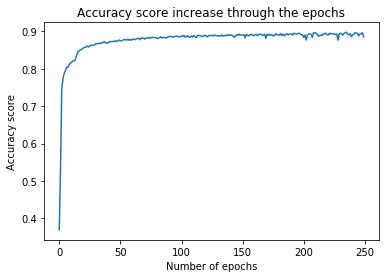

In [238]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history4.history['acc'])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy score')
plt.title('Accuracy score increase through the epochs')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.